In [64]:

pip install pandas matplotlib seaborn textblob

In [2]:
# College Event Feedback Analysis - Internship Project
# Turn student feedback into actionable insights using data science!

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
print("🎓 College Event Feedback Analysis Project")
print("=" * 50)

🎓 College Event Feedback Analysis Project


In [5]:
# ==========================================
# STEP 1: CREATE SAMPLE DATASET
# ==========================================

# Create realistic sample data (simulating Google Forms responses)
np.random.seed(42)

# Event types and names
event_types = ['Tech Fest', 'Workshop', 'Cultural Event', 'Seminar', 'Sports Event']
event_names = {
    'Tech Fest': ['CodeFest 2024', 'Hackathon Supreme', 'AI & ML Summit'],
    'Workshop': ['Python Bootcamp', 'Data Science 101', 'Web Development Workshop'],
    'Cultural Event': ['Annual Day', 'Music Night', 'Dance Competition'],
    'Seminar': ['Career Guidance', 'Industry Talk', 'Research Symposium'],
    'Sports Event': ['Basketball Tournament', 'Cricket Championship', 'Athletic Meet']
}

departments = ['Computer Science', 'Electronics', 'Mechanical', 'Civil', 'Management']
feedback_samples = {
    'positive': [
        "Amazing event! Learned so much and had great fun.",
        "Excellent organization and very informative content.",
        "Great speakers and interactive sessions. Loved it!",
        "Outstanding event with perfect timing and coordination.",
        "Fantastic experience! Would definitely attend again.",
        "Very well planned and executed. Kudos to the team!",
        "Inspiring content and great networking opportunities.",
        "Perfect venue and amazing food arrangements too!"
    ],
    'neutral': [
        "The event was okay, could have been better organized.",
        "Content was good but venue was a bit crowded.",
        "Average event, some sessions were interesting.",
        "It was fine, nothing extraordinary but decent.",
        "Moderate experience, room for improvement in logistics.",
        "The event was alright, expected more interaction.",
        "Standard event, some good points and some average ones.",
        "Decent content but timing could have been better."
    ],
    'negative': [
        "Poor organization and timing issues throughout.",
        "Very disappointing, waste of time honestly.",
        "Terrible sound system and uncomfortable seating.",
        "Boring content and unprepared speakers.",
        "Badly managed event with long waiting times.",
        "Not worth attending, very poorly executed.",
        "Awful experience, everything went wrong.",
        "Complete disaster, organizers were unprepared."
    ]
}


In [6]:
# Generate sample data
def generate_sample_data(n_responses=250):
    data = []

    for i in range(n_responses):
        # Choose event type and name
        event_type = np.random.choice(event_types)
        event_name = np.random.choice(event_names[event_type])
        department = np.random.choice(departments)

        # Generate rating with some correlation to feedback sentiment
        sentiment_choice = np.random.choice(['positive', 'neutral', 'negative'],
                                          p=[0.5, 0.3, 0.2])  # More positive feedback

        if sentiment_choice == 'positive':
            rating = np.random.choice([4, 5], p=[0.3, 0.7])
        elif sentiment_choice == 'neutral':
            rating = np.random.choice([2, 3, 4], p=[0.2, 0.6, 0.2])
        else:
            rating = np.random.choice([1, 2], p=[0.4, 0.6])

        # Choose feedback comment
        comment = np.random.choice(feedback_samples[sentiment_choice])

        # Add some variation to comments
        if np.random.random() > 0.7:  # 30% chance of empty comment
            comment = ""

        data.append({
            'Timestamp': pd.Timestamp.now() - pd.Timedelta(days=np.random.randint(1, 90)),
            'Event_Name': event_name,
            'Event_Type': event_type,
            'Department': department,
            'Overall_Rating': rating,
            'Content_Rating': np.random.randint(1, 6),
            'Organization_Rating': np.random.randint(1, 6),
            'Comments': comment,
            'Year_of_Study': np.random.choice(['1st Year', '2nd Year', '3rd Year', '4th Year']),
            'Would_Recommend': np.random.choice(['Yes', 'No'], p=[0.75, 0.25])
        })

    return pd.DataFrame(data)

In [51]:
# Generate the dataset
df = generate_sample_data(250)

print(f"✅ Generated sample dataset with {len(df)} responses")
print(f"📊 Dataset shape: {df.shape}")


✅ Generated sample dataset with 250 responses
📊 Dataset shape: (250, 10)


In [53]:
# ==========================================
# STEP 2: DATA EXPLORATION & CLEANING
# ==========================================
print("\n" + "="*50)
print("🔍 DATA EXPLORATION & CLEANING")
print("=" * 50)


🔍 DATA EXPLORATION & CLEANING


In [9]:
# Display basic info
print("\n📋 Dataset Info:")
print(df.info())


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            250 non-null    datetime64[ns]
 1   Event_Name           250 non-null    object        
 2   Event_Type           250 non-null    object        
 3   Department           250 non-null    object        
 4   Overall_Rating       250 non-null    int64         
 5   Content_Rating       250 non-null    int64         
 6   Organization_Rating  250 non-null    int64         
 7   Comments             250 non-null    object        
 8   Year_of_Study        250 non-null    object        
 9   Would_Recommend      250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 19.7+ KB
None


In [10]:
print("\n📈 Dataset Statistics:")
print(df.describe())


📈 Dataset Statistics:
                           Timestamp  Overall_Rating  Content_Rating  \
count                            250      250.000000      250.000000   
mean   2025-07-06 21:34:27.329672448        3.536000        2.992000   
min       2025-05-23 15:54:36.887187        1.000000        1.000000   
25%    2025-06-17 15:54:36.912743936        2.000000        2.000000   
50%    2025-07-07 15:54:36.914655488        4.000000        3.000000   
75%    2025-07-26 15:54:36.941218816        5.000000        4.000000   
max       2025-08-19 15:54:36.936625        5.000000        5.000000   
std                              NaN        1.338608        1.397048   

       Organization_Rating  
count           250.000000  
mean              3.100000  
min               1.000000  
25%               2.000000  
50%               3.000000  
75%               4.000000  
max               5.000000  
std               1.511004  


In [11]:
print(f"\n🧹 Missing Values:")
print(df.isnull().sum())


🧹 Missing Values:
Timestamp              0
Event_Name             0
Event_Type             0
Department             0
Overall_Rating         0
Content_Rating         0
Organization_Rating    0
Comments               0
Year_of_Study          0
Would_Recommend        0
dtype: int64


In [12]:
print(f"\n📝 Sample of the data:")
print(df.head())


📝 Sample of the data:
                   Timestamp             Event_Name      Event_Type  \
0 2025-06-06 15:54:36.885774        Career Guidance         Seminar   
1 2025-06-21 15:54:36.886422            Music Night  Cultural Event   
2 2025-06-01 15:54:36.886802  Basketball Tournament    Sports Event   
3 2025-05-23 15:54:36.887187         AI & ML Summit       Tech Fest   
4 2025-07-04 15:54:36.887570   Cricket Championship    Sports Event   

         Department  Overall_Rating  Content_Rating  Organization_Rating  \
0        Mechanical               3               3                    5   
1        Management               2               5                    1   
2  Computer Science               3               3                    4   
3        Management               2               4                    2   
4             Civil               5               3                    1   

                                            Comments Year_of_Study  \
0      Content was good

In [13]:
# Clean the data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Comments'] = df['Comments'].fillna('')  # Fill empty comments

print("\n✅ Data cleaning completed!")


✅ Data cleaning completed!


In [61]:
# ==========================================
# STEP 3: BASIC DATA ANALYSIS
# ==========================================
print("=" * 50)
print("📊 BASIC DATA ANALYSIS")
print("=" * 50)

📊 BASIC DATA ANALYSIS


In [15]:
# Event type distribution
print("\n🎯 Event Type Distribution:")
event_counts = df['Event_Type'].value_counts()
print(event_counts)


🎯 Event Type Distribution:
Event_Type
Cultural Event    57
Workshop          55
Tech Fest         51
Sports Event      47
Seminar           40
Name: count, dtype: int64


In [16]:
# Rating distributions
print(f"\n⭐ Average Overall Rating: {df['Overall_Rating'].mean():.2f}")
print(f"📊 Rating Distribution:")
print(df['Overall_Rating'].value_counts().sort_index())


⭐ Average Overall Rating: 3.54
📊 Rating Distribution:
Overall_Rating
1    24
2    40
3    44
4    62
5    80
Name: count, dtype: int64


In [17]:
# Department analysis
print(f"\n🏫 Department with most events: {df['Department'].mode().iloc[0]}")


🏫 Department with most events: Management


In [18]:
# ==========================================
# STEP 4: VISUALIZATIONS
# ==========================================

print("\n📈 CREATING VISUALIZATIONS")
print("=" * 50)

# Create a figure with subplots
fig = plt.figure(figsize=(20, 15))


📈 CREATING VISUALIZATIONS


<Figure size 2000x1500 with 0 Axes>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

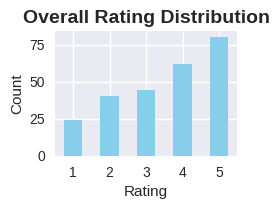

In [19]:
# 1. Overall Rating Distribution
plt.subplot(3, 3, 1)
df['Overall_Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Overall Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Event Type Distribution')

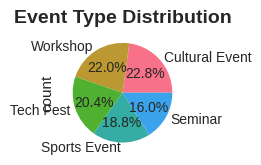

In [20]:
# 2. Event Type Distribution
plt.subplot(3, 3, 2)
df['Event_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Event Type Distribution', fontsize=14, fontweight='bold')

Text(0.5, 0, 'Average Rating')

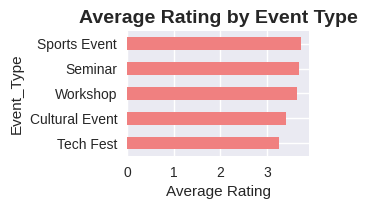

In [21]:
# 3. Average Rating by Event Type
plt.subplot(3, 3, 3)
avg_ratings = df.groupby('Event_Type')['Overall_Rating'].mean().sort_values(ascending=True)
avg_ratings.plot(kind='barh', color='lightcoral')
plt.title('Average Rating by Event Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Mechanical'),
  Text(2, 0, 'Management'),
  Text(3, 0, 'Civil'),
  Text(4, 0, 'Computer Science')])

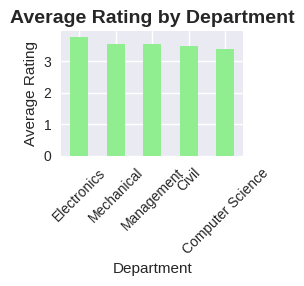

In [22]:
# 4. Department vs Rating
plt.subplot(3, 3, 4)
dept_ratings = df.groupby('Department')['Overall_Rating'].mean().sort_values(ascending=False)
dept_ratings.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Would Recommend Distribution')

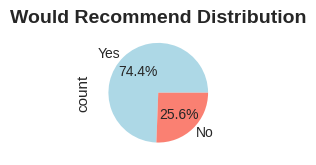

In [23]:
# 5. Recommendation Analysis
plt.subplot(3, 3, 5)
df['Would_Recommend'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Would Recommend Distribution', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Rating vs Recommendation')

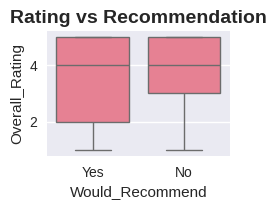

In [24]:
# 6. Rating vs Recommendation
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='Would_Recommend', y='Overall_Rating')
plt.title('Rating vs Recommendation', fontsize=14, fontweight='bold')

(array([0, 1, 2, 3]),
 [Text(0, 0, '1st Year'),
  Text(1, 0, '2nd Year'),
  Text(2, 0, '3rd Year'),
  Text(3, 0, '4th Year')])

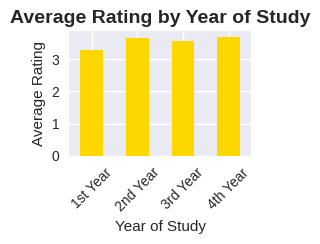

In [25]:
# 7. Year of Study Analysis
plt.subplot(3, 3, 7)
year_ratings = df.groupby('Year_of_Study')['Overall_Rating'].mean()
year_ratings.plot(kind='bar', color='gold')
plt.title('Average Rating by Year of Study', fontsize=14, fontweight='bold')
plt.xlabel('Year of Study')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Content vs Organization Rating')

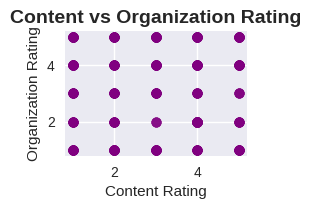

In [26]:
# 8. Content vs Organization Rating
plt.subplot(3, 3, 8)
plt.scatter(df['Content_Rating'], df['Organization_Rating'], alpha=0.6, color='purple')
plt.xlabel('Content Rating')
plt.ylabel('Organization Rating')
plt.title('Content vs Organization Rating', fontsize=14, fontweight='bold')

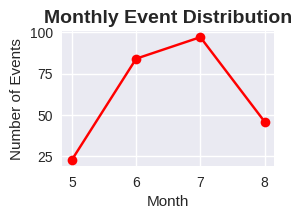

In [27]:
# 9. Monthly Event Trend
plt.subplot(3, 3, 9)
monthly_events = df.groupby(df['Timestamp'].dt.month).size()
monthly_events.plot(kind='line', marker='o', color='red')
plt.title('Monthly Event Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Events')

plt.tight_layout()
plt.show()

In [54]:
# ==========================================
# STEP 5: SENTIMENT ANALYSIS
# ==========================================
print("=" * 50)
print("🧠 SENTIMENT ANALYSIS USING NLP")
print("=" * 50)

def analyze_sentiment(text):
    """Analyze sentiment using TextBlob"""
    if not text or pd.isna(text) or text.strip() == '':
        return 0, 'neutral'

    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        return polarity, 'positive'
    elif polarity < -0.1:
        return polarity, 'negative'
    else:
        return polarity, 'neutral'

🧠 SENTIMENT ANALYSIS USING NLP


In [29]:
# Apply sentiment analysis
print("🔄 Analyzing sentiment for all comments...")
sentiment_results = df['Comments'].apply(analyze_sentiment)
df['Sentiment_Score'] = sentiment_results.apply(lambda x: x[0])
df['Sentiment_Label'] = sentiment_results.apply(lambda x: x[1])

🔄 Analyzing sentiment for all comments...


In [30]:
# Sentiment distribution
print("\n📊 Sentiment Distribution:")
sentiment_dist = df['Sentiment_Label'].value_counts()
print(sentiment_dist)


📊 Sentiment Distribution:
Sentiment_Label
positive    130
neutral      87
negative     33
Name: count, dtype: int64


In [31]:
# Sentiment vs Rating correlation
print(f"\n🔗 Correlation between Sentiment Score and Rating: {df['Sentiment_Score'].corr(df['Overall_Rating']):.3f}")


🔗 Correlation between Sentiment Score and Rating: 0.593


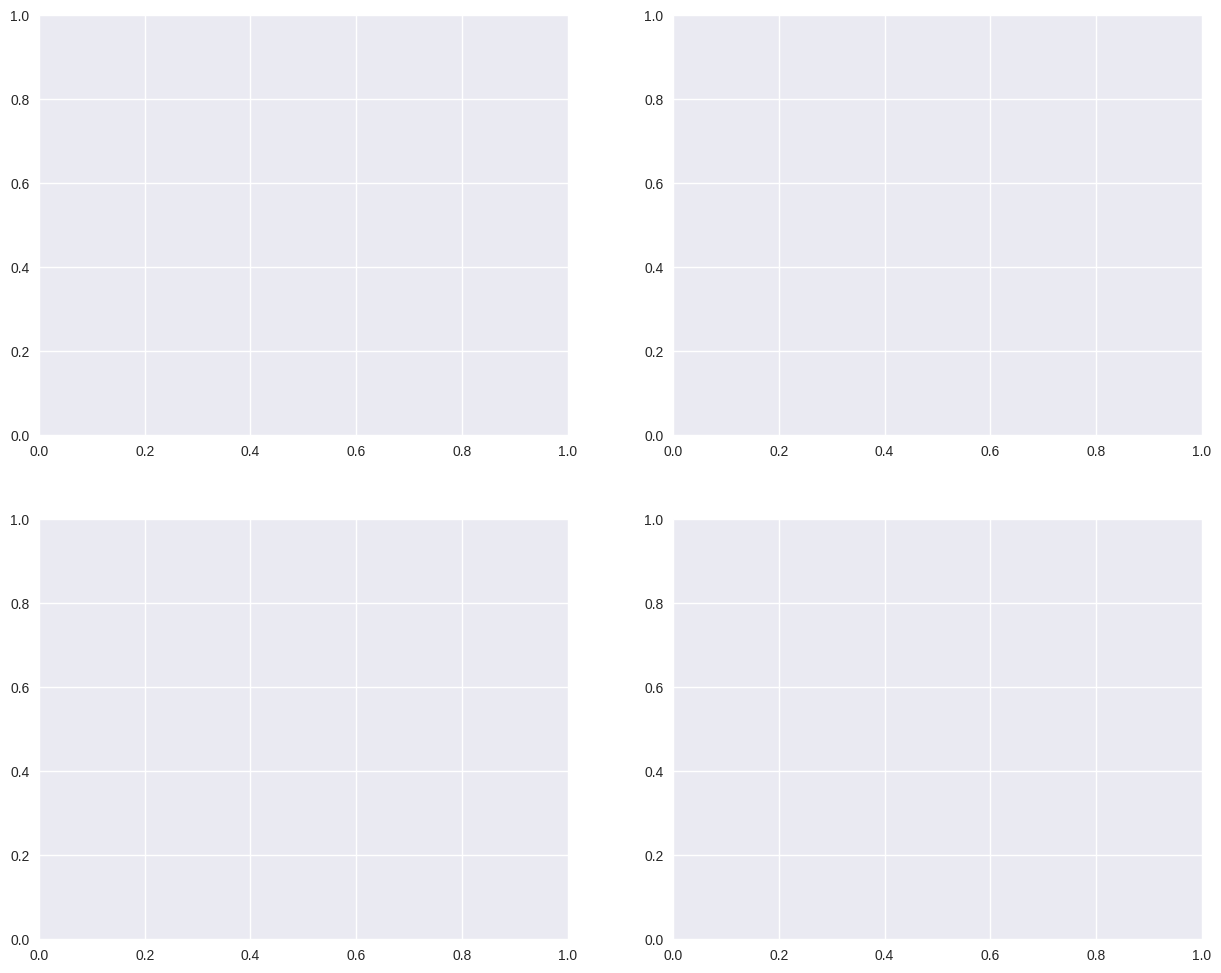

In [32]:
# Visualize sentiment analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

In [33]:
# Sentiment distribution
sentiment_dist.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')


Text(0.5, 1.0, 'Sentiment Distribution')

In [34]:
# Sentiment by Event Type
sentiment_by_event = pd.crosstab(df['Event_Type'], df['Sentiment_Label'])
sentiment_by_event.plot(kind='bar', ax=ax2, stacked=True)
ax2.set_title('Sentiment by Event Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Event Type')
ax2.set_ylabel('Count')
ax2.legend(title='Sentiment')
ax2.tick_params(axis='x', rotation=45)

In [35]:
# Sentiment Score vs Rating
ax3.scatter(df['Sentiment_Score'], df['Overall_Rating'], alpha=0.6, color='purple')
ax3.set_xlabel('Sentiment Score')
ax3.set_ylabel('Overall Rating')
ax3.set_title('Sentiment Score vs Overall Rating', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Sentiment Score vs Overall Rating')

In [36]:
# Average sentiment by rating
avg_sentiment = df.groupby('Overall_Rating')['Sentiment_Score'].mean()
avg_sentiment.plot(kind='bar', ax=ax4, color='orange')
ax4.set_title('Average Sentiment Score by Rating', fontsize=14, fontweight='bold')
ax4.set_xlabel('Overall Rating')
ax4.set_ylabel('Average Sentiment Score')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [55]:
# ==========================================
# STEP 6: ADVANCED ANALYSIS
# ==========================================
print("=" * 50)
print("🎯 ADVANCED ANALYSIS & INSIGHTS")
print("=" * 50)

🎯 ADVANCED ANALYSIS & INSIGHTS


In [38]:
# Top performing events
print("\n🏆 TOP PERFORMING EVENTS:")
top_events = df.groupby('Event_Name').agg({
    'Overall_Rating': ['mean', 'count'],
    'Would_Recommend': lambda x: (x == 'Yes').sum() / len(x) * 100
}).round(2)

top_events.columns = ['Avg_Rating', 'Response_Count', 'Recommendation_Pct']
top_events = top_events[top_events['Response_Count'] >= 3]  # At least 3 responses
top_events = top_events.sort_values('Avg_Rating', ascending=False)
print(top_events.head(10))


🏆 TOP PERFORMING EVENTS:
                       Avg_Rating  Response_Count  Recommendation_Pct
Event_Name                                                           
Athletic Meet                4.20              15               86.67
Annual Day                   4.19              16               75.00
Data Science 101             4.00              19               73.68
Career Guidance              3.94              16               62.50
Research Symposium           3.90              10               70.00
Python Bootcamp              3.67              18               66.67
Basketball Tournament        3.60              15               73.33
AI & ML Summit               3.50              22               77.27
Cricket Championship         3.41              17               88.24
Hackathon Supreme            3.33              12               58.33


In [39]:
# Problem areas identification
print("\n⚠️  AREAS FOR IMPROVEMENT:")
low_rated = df[df['Overall_Rating'] <= 2]
if not low_rated.empty:
    print(f"Events with rating ≤ 2: {len(low_rated)} responses")
    problem_events = low_rated['Event_Type'].value_counts()
    print("Problem event types:")
    print(problem_events)


⚠️  AREAS FOR IMPROVEMENT:
Events with rating ≤ 2: 64 responses
Problem event types:
Event_Type
Cultural Event    18
Tech Fest         16
Workshop          12
Seminar            9
Sports Event       9
Name: count, dtype: int64


In [40]:
    # Common negative feedback themes
    negative_comments = df[df['Sentiment_Label'] == 'negative']['Comments']
    print(f"\nSample negative feedback:")
    for i, comment in enumerate(negative_comments.head(3)):
        if comment:
            print(f"{i+1}. {comment}")


Sample negative feedback:
1. Not worth attending, very poorly executed.
2. Awful experience, everything went wrong.
3. Very disappointing, waste of time honestly.


In [41]:
# Department performance
print("\n🏫 DEPARTMENT PERFORMANCE:")
dept_performance = df.groupby('Department').agg({
    'Overall_Rating': 'mean',
    'Sentiment_Score': 'mean',
    'Would_Recommend': lambda x: (x == 'Yes').sum() / len(x) * 100
}).round(2)
dept_performance.columns = ['Avg_Rating', 'Avg_Sentiment', 'Recommendation_Pct']
dept_performance = dept_performance.sort_values('Avg_Rating', ascending=False)
print(dept_performance)


🏫 DEPARTMENT PERFORMANCE:
                  Avg_Rating  Avg_Sentiment  Recommendation_Pct
Department                                                     
Electronics             3.76           0.18               73.47
Mechanical              3.55           0.20               74.51
Management              3.53           0.17               90.20
Civil                   3.46           0.23               68.00
Computer Science        3.39           0.20               65.31


In [57]:
# ==========================================
# STEP 7: WORD CLOUD (Text Visualization)
# ==========================================
print("=" * 50)
print("☁️  CREATING WORD CLOUD")
print("=" * 50)


☁️  CREATING WORD CLOUD


In [43]:
# Simple word frequency analysis (alternative to word cloud library)
from collections import Counter
import re

def create_word_frequency(text_series, sentiment_filter=None):
    """Create word frequency from text series"""
    if sentiment_filter:
        text_series = text_series[df['Sentiment_Label'] == sentiment_filter]

    all_text = ' '.join(text_series.dropna().astype(str))
    # Clean text: remove punctuation and convert to lowercase
    words = re.findall(r'\b\w+\b', all_text.lower())
    # Filter out common stop words
    stop_words = {'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'was', 'are', 'were', 'a', 'an', 'it', 'this', 'that'}
    words = [word for word in words if word not in stop_words and len(word) > 2]

    return Counter(words)

In [44]:
# Analyze word frequencies
print("\n📝 Most common words in positive feedback:")
positive_words = create_word_frequency(df['Comments'], 'positive')
for word, count in positive_words.most_common(10):
    print(f"'{word}': {count} times")

print("\n📝 Most common words in negative feedback:")
negative_words = create_word_frequency(df['Comments'], 'negative')
for word, count in negative_words.most_common(10):
    print(f"'{word}': {count} times")


📝 Most common words in positive feedback:
'event': 47 times
'great': 34 times
'content': 31 times
'amazing': 22 times
'very': 22 times
'timing': 19 times
'perfect': 19 times
'decent': 15 times
'learned': 15 times
'much': 15 times

📝 Most common words in negative feedback:
'very': 13 times
'not': 7 times
'worth': 7 times
'attending': 7 times
'poorly': 7 times
'executed': 7 times
'awful': 6 times
'experience': 6 times
'everything': 6 times
'went': 6 times



☁️  Generating Word Cloud for Positive Feedback...


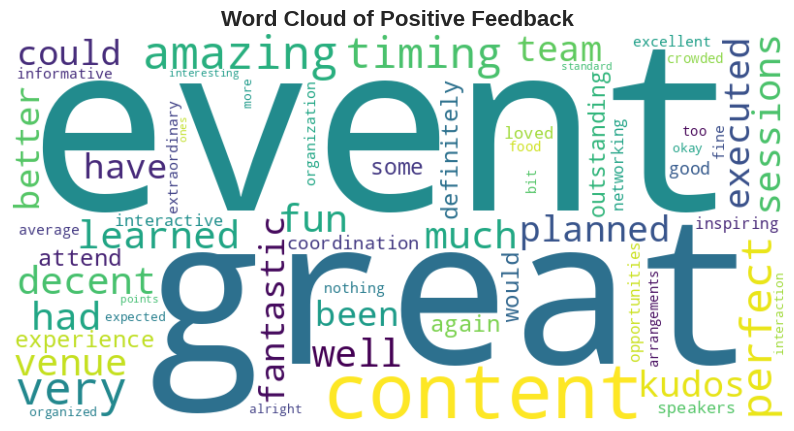

In [62]:
# Create a word cloud for positive feedback
try:
    from wordcloud import WordCloud
    print("\n☁️  Generating Word Cloud for Positive Feedback...")

    # Convert the Counter object to a dictionary
    positive_word_dict = dict(positive_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Positive Feedback', fontsize=16, fontweight='bold')
    plt.show()

except ImportError:
    print("\nSkipping Word Cloud: 'wordcloud' library not found. Please install it: pip install wordcloud")


☁️  Generating Word Cloud for Negative Feedback...


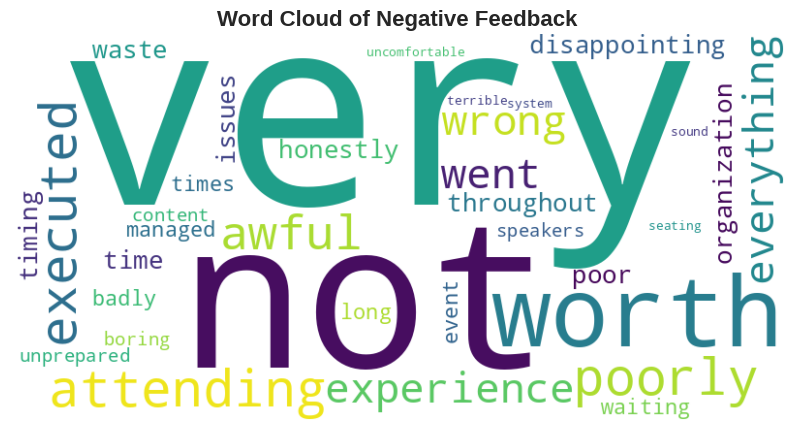

In [63]:
# Create a word cloud for negative feedback
try:
    from wordcloud import WordCloud
    print("\n☁️  Generating Word Cloud for Negative Feedback...")

    # Convert the Counter object to a dictionary
    negative_word_dict = dict(negative_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Negative Feedback', fontsize=16, fontweight='bold')
    plt.show()

except ImportError:
    print("\nSkipping Word Cloud: 'wordcloud' library not found. Please install it: pip install wordcloud")

In [58]:
# ==========================================
# STEP 8: KEY RECOMMENDATIONS
# ==========================================
print("=" * 50)
print("💡 KEY RECOMMENDATIONS FOR EVENT ORGANIZERS")
print("=" * 50)

💡 KEY RECOMMENDATIONS FOR EVENT ORGANIZERS


In [46]:
# Calculate key metrics
overall_satisfaction = df['Overall_Rating'].mean()
recommendation_rate = (df['Would_Recommend'] == 'Yes').sum() / len(df) * 100
positive_sentiment = (df['Sentiment_Label'] == 'positive').sum() / len(df) * 100

print(f"\n📊 CURRENT PERFORMANCE METRICS:")
print(f"   • Overall Satisfaction: {overall_satisfaction:.2f}/5.0")
print(f"   • Recommendation Rate: {recommendation_rate:.1f}%")
print(f"   • Positive Sentiment: {positive_sentiment:.1f}%")




📊 CURRENT PERFORMANCE METRICS:
   • Overall Satisfaction: 3.54/5.0
   • Recommendation Rate: 74.4%
   • Positive Sentiment: 52.0%


In [47]:
print(f"\n🎯 TOP RECOMMENDATIONS:")

# Recommendation 1: Event type performance
best_event_type = df.groupby('Event_Type')['Overall_Rating'].mean().idxmax()
worst_event_type = df.groupby('Event_Type')['Overall_Rating'].mean().idxmin()
print(f"1. FOCUS ON SUCCESS FACTORS:")
print(f"   • '{best_event_type}' events perform best (avg: {df.groupby('Event_Type')['Overall_Rating'].mean().max():.2f}/5)")
print(f"   • Apply their success strategies to improve '{worst_event_type}' events")

# Recommendation 2: Department collaboration
best_dept = dept_performance.index[0]
print(f"\n2. LEARN FROM TOP PERFORMERS:")
print(f"   • {best_dept} department shows best results")
print(f"   • Share their best practices across departments")

# Recommendation 3: Address negative feedback
if (df['Sentiment_Label'] == 'negative').sum() > 0:
    print(f"\n3. ADDRESS COMMON COMPLAINTS:")
    common_issues = negative_words.most_common(5)
    print(f"   • Top concerns: {', '.join([word for word, _ in common_issues])}")
    print(f"   • Focus on organization, timing, and content quality")

# Recommendation 4: Leverage positive feedback
if (df['Sentiment_Label'] == 'positive').sum() > 0:
    print(f"\n4. AMPLIFY POSITIVE ASPECTS:")
    positive_themes = positive_words.most_common(5)
    print(f"   • Students appreciate: {', '.join([word for word, _ in positive_themes])}")
    print(f"   • Continue these successful elements")

print(f"\n5. SPECIFIC ACTION ITEMS:")
print(f"   • Target improvement for events rated below 3.5")
print(f"   • Increase response collection (current: {len(df)} responses)")
print(f"   • Implement monthly feedback reviews")
print(f"   • Create event organizer training program")


🎯 TOP RECOMMENDATIONS:
1. FOCUS ON SUCCESS FACTORS:
   • 'Sports Event' events perform best (avg: 3.72/5)
   • Apply their success strategies to improve 'Tech Fest' events

2. LEARN FROM TOP PERFORMERS:
   • Electronics department shows best results
   • Share their best practices across departments

3. ADDRESS COMMON COMPLAINTS:
   • Top concerns: very, not, worth, attending, poorly
   • Focus on organization, timing, and content quality

4. AMPLIFY POSITIVE ASPECTS:
   • Students appreciate: event, great, content, amazing, very
   • Continue these successful elements

5. SPECIFIC ACTION ITEMS:
   • Target improvement for events rated below 3.5
   • Increase response collection (current: 250 responses)
   • Implement monthly feedback reviews
   • Create event organizer training program


In [48]:
# ==========================================
# STEP 9: SAVE RESULTS
# ==========================================

print("\n💾 SAVING RESULTS")
print("=" * 50)

# Create summary report
summary_stats = {
    'Total_Responses': len(df),
    'Average_Rating': df['Overall_Rating'].mean(),
    'Recommendation_Rate': recommendation_rate,
    'Positive_Sentiment_Rate': positive_sentiment,
    'Most_Popular_Event_Type': df['Event_Type'].mode().iloc[0],
    'Best_Performing_Department': best_dept,
    'Response_Period_Days': (df['Timestamp'].max() - df['Timestamp'].min()).days
}

print("📋 Summary Statistics:")
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"   • {key.replace('_', ' ')}: {value:.2f}")
    else:
        print(f"   • {key.replace('_', ' ')}: {value}")



💾 SAVING RESULTS
📋 Summary Statistics:
   • Total Responses: 250
   • Average Rating: 3.54
   • Recommendation Rate: 74.40
   • Positive Sentiment Rate: 52.00
   • Most Popular Event Type: Cultural Event
   • Best Performing Department: Electronics
   • Response Period Days: 88


In [49]:
# Save processed data (in a real scenario, you'd save to CSV)
print(f"\n✅ Analysis completed successfully!")
print(f"📊 Dataset analyzed: {len(df)} responses")
print(f"🎯 Key insights generated for event improvement")

print("\n" + "="*60)
print("🎓 COLLEGE EVENT FEEDBACK ANALYSIS - COMPLETE!")
print("📧 Contact: [Your email] | 📅 Date: " + str(pd.Timestamp.now().date()))
print("="*60)


✅ Analysis completed successfully!
📊 Dataset analyzed: 250 responses
🎯 Key insights generated for event improvement

🎓 COLLEGE EVENT FEEDBACK ANALYSIS - COMPLETE!
📧 Contact: [Your email] | 📅 Date: 2025-08-20



🌐 CREATING 3D VISUALIZATIONS


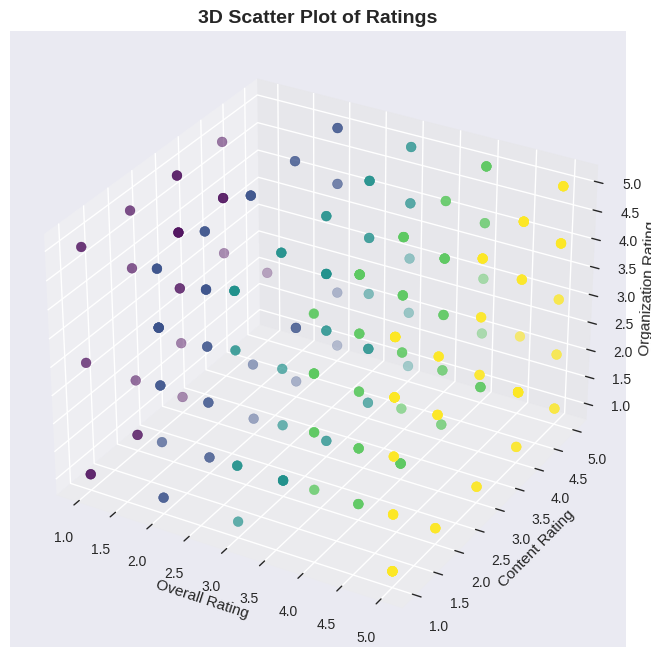

In [50]:
# ==========================================
# STEP 10: 3D VISUALIZATIONS
# ==========================================

print("\n🌐 CREATING 3D VISUALIZATIONS")
print("=" * 50)

from mpl_toolkits.mplot3d import Axes3D

# 1. 3D Scatter plot of Ratings
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Overall_Rating'], df['Content_Rating'], df['Organization_Rating'], c=df['Overall_Rating'], cmap='viridis', s=50)

ax.set_xlabel('Overall Rating')
ax.set_ylabel('Content Rating')
ax.set_zlabel('Organization Rating')
ax.set_title('3D Scatter Plot of Ratings', fontsize=14, fontweight='bold')

plt.show()